In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# Configure matplotlib for better inline plotting in notebooks
%matplotlib inline
plt.style.use('dark_background')

In [2]:
print("Loading pre-computed embeddings...")
embeddings = np.load('../data/embeddings.npy')
print(f"Embeddings loaded. Shape: {embeddings.shape}")

print("\nLoading original data to get the labels (ground truth)...")
# We only need the 'target' for coloring our plot
newsgroups = fetch_20newsgroups(subset='all')
labels = newsgroups.target
target_names = newsgroups.target_names
print(f"Labels loaded. Found {len(np.unique(labels))} unique topics.")

Loading pre-computed embeddings...
Embeddings loaded. Shape: (18846, 384)

Loading original data to get the labels (ground truth)...
Labels loaded. Found 20 unique topics.


In [3]:
print("Starting UMAP dimensionality reduction...")
print("This can take a few minutes...")

# UMAP configuration: n_neighbors is a key parameter. 15 is a good default.
# min_dist controls how tightly points are clustered.
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='cosine',
    random_state=42, # for reproducibility
    verbose=True
)

embedding_2d = reducer.fit_transform(embeddings)

print(f"UMAP complete. New shape: {embedding_2d.shape}")

Starting UMAP dimensionality reduction...
This can take a few minutes...
UMAP(angular_rp_forest=True, metric='cosine', n_jobs=1, random_state=42, verbose=True)


/Users/apple/Developer/GitHub/Principia-Automatica/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Thu Aug  7 22:08:37 2025 Construct fuzzy simplicial set
Thu Aug  7 22:08:37 2025 Finding Nearest Neighbors
Thu Aug  7 22:08:37 2025 Building RP forest with 12 trees
Thu Aug  7 22:08:39 2025 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Thu Aug  7 22:08:45 2025 Finished Nearest Neighbor Search
Thu Aug  7 22:08:46 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Aug  7 22:08:54 2025 Finished embedding
UMAP complete. New shape: (18846, 2)


Generating visualization...


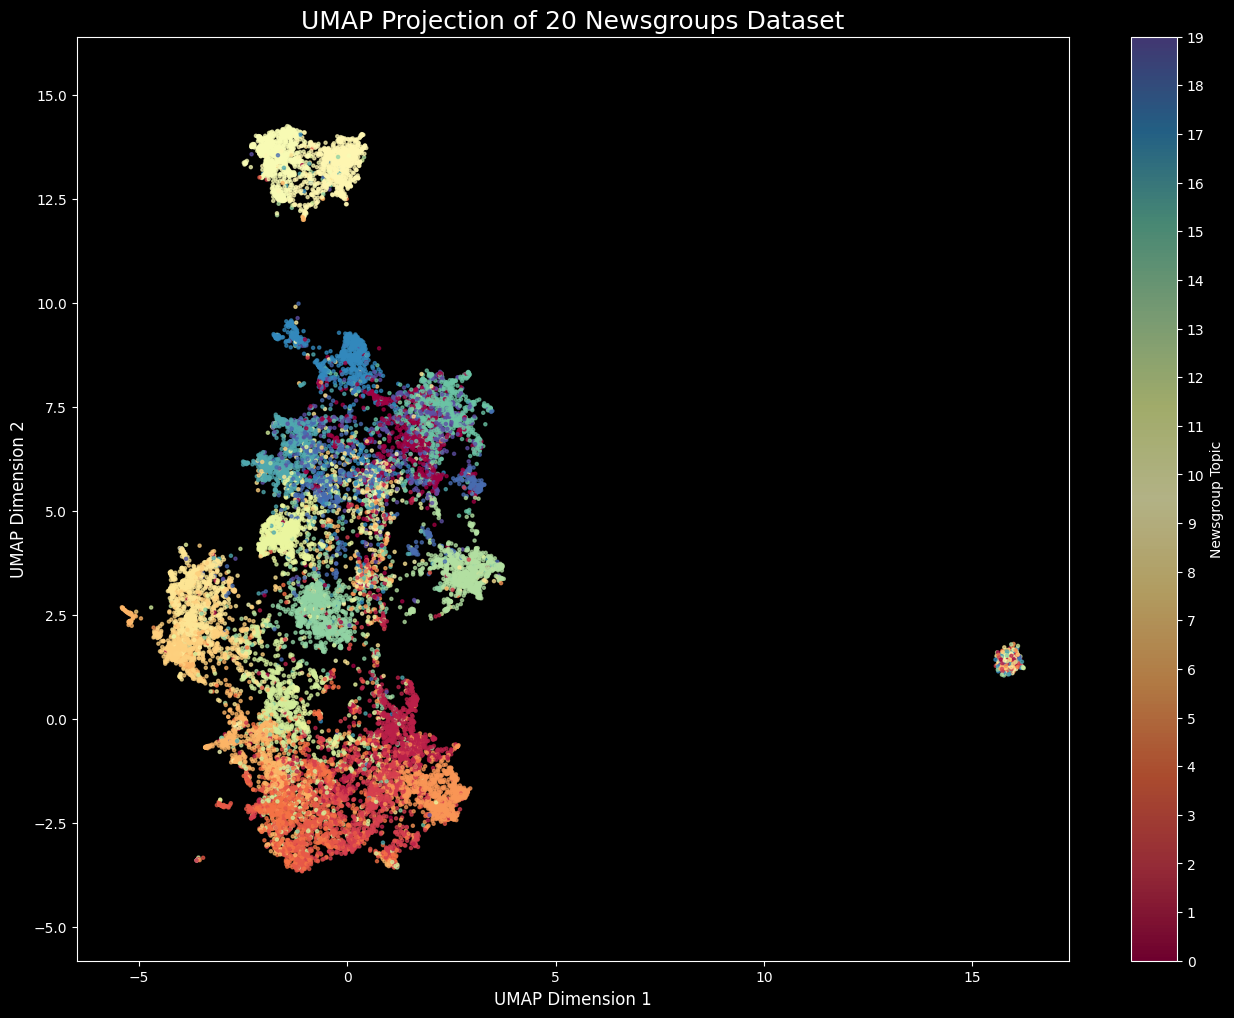

In [4]:
print("Generating visualization...")

plt.figure(figsize=(16, 12))
scatter = plt.scatter(
    embedding_2d[:, 0],
    embedding_2d[:, 1],
    c=labels,          # Color each point by its true newsgroup label
    cmap='Spectral',   # A color map that works well for many distinct categories
    s=5,               # Small point size
    alpha=0.7          # Slight transparency
)

plt.title('UMAP Projection of 20 Newsgroups Dataset', fontsize=18)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.gca().set_aspect('equal', 'datalim')

# Add a colorbar legend
plt.colorbar(scatter, ticks=range(len(target_names)), label='Newsgroup Topic')

plt.show()